<a href="https://colab.research.google.com/github/aashishpiitk/from-Scratch/blob/master/fashion_mnist_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#important note never use tensorflow.keras and keras at the same time as they are a lot different and can cause problems

In [0]:
from tensorflow import keras         
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D,Dense,ReLU,Softmax,MaxPool2D,AvgPool2D,Input,BatchNormalization
from tensorflow.keras.activations import tanh,sigmoid
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [0]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


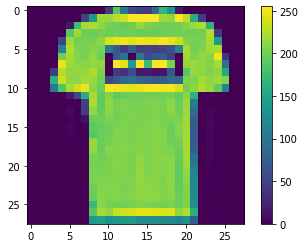

In [141]:
plt.figure()
plt.imshow(x_train[1].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#preprocessing x_train
x_train=x_train.reshape((-1,28,28,1))
x_train=x_train.astype("float32")

#preprocessing x_test
x_test=x_test.reshape((-1,28,28,1))
x_test=x_test.astype("float32")

In [143]:
x_train.dtype

dtype('float32')

In [144]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
def LeNet(input_shape):
  input=Input(shape=input_shape)           #declaring a placeholder
  print(input_shape)
  conv1=Conv2D(filters=6,kernel_size=3,padding="same")(input)
  bn=BatchNormalization(axis=3)(conv1)
  conv1=ReLU()(bn)

  pool1=Conv2D(6,2,(2,2))(conv1)
  bn=BatchNormalization(axis=3)(pool1)
  pool1=ReLU()(bn)

  conv2=Conv2D(16,5,1)(pool1)
  bn=BatchNormalization(axis=3)(conv2)
  conv2=ReLU()(bn)

  pool2=Conv2D(16,2,2)(conv2)
  bn=BatchNormalization(axis=3)(pool2)
  pool2=ReLU()(bn)

  flatten=Conv2D(120,5)(pool2)
  bn=BatchNormalization(axis=3)(flatten)
  flatten=ReLU()(bn)


  full1=Dense(84,activation="tanh")(flatten)

  full2=Dense(10,activation="softmax")(full1)

  full2=tf.reshape(full2,(-1,10))


  model=Model(inputs=input,outputs=full2)      #creating a model with placeholder
  return model

In [146]:
#convert x_train to tensor and dtype=float32
#x_train=tf.tensor(x_train)
#convert y_train and y_test to one hot 
# y_train=y_train.reshape(-1,1)
# y_test=y_test.reshape(-1,1)
print(y_train.shape)

(60000,)


In [147]:
print(y_train.shape)

(60000,)


In [148]:
y_train=to_categorical(y_train,num_classes=10,dtype="float32").reshape(60000,10)
y_test=to_categorical(y_test,num_classes=10,dtype="float32").reshape(-1,10)
print(y_train.shape)

(60000, 10)


In [0]:
def train(x_train,y_train):
  model=LeNet(x_train.shape[1:4])
  model.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
  print(x_train.shape)
  lr_reducer=ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)#making an object from this class
  early_stopper=EarlyStopping(min_delta=0.001,patience=10)
  model.fit(x_train,
            y_train,batch_size=60,
            epochs=10,
            callbacks=[lr_reducer, early_stopper])
  
  test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
  print('\nTest accuracy:', test_acc)

In [150]:
train(x_train,y_train)

(28, 28, 1)
(60000, 28, 28, 1)
Epoch 1/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.4433 - accuracy: 0.8403 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.3107 - accuracy: 0.8834 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.2724 - accuracy: 0.8984 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.2488 - accuracy: 0.9058 - lr: 0.0010
Epoch 5/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.2293 - accuracy: 0.9142 - lr: 0.0010
Epoch 6/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.2133 - accuracy: 0.9191 - lr: 0.0010
Epoch 7/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.1977 - accuracy: 0.9247 - lr: 0.0010
Epoch 8/10
1000/1000 [==============================] - 34s 34ms/step - loss: 0.1852 - accuracy: 0.9297 - lr: 0.0010
Epoch 9/10
1000/1000 [===========